In [1]:
import tensorflow as tf
from tensorflow.keras.datasets.boston_housing import load_data

# Dataset

In [2]:
(x_train, y_train), (x_test, y_test) = load_data(path='boston_housing.npz', test_split=0.2, seed=113)             # seed는 고정시키기 위한 것. 300이하로 설정하는 것이 좋다. 
x_train.shape, y_train.shape, x_test.shape, y_test.shape, type(x_train)                                           # 넘파이 파일을 데이터베이스에 담아야 한다.

((404, 13), (404,), (102, 13), (102,), numpy.ndarray)

연속형이기 때문에 y값을 볼 필요는 없다. 

In [3]:
import pandas as pd

In [4]:
df = pd.DataFrame(x_train)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       404 non-null    float64
 1   1       404 non-null    float64
 2   2       404 non-null    float64
 3   3       404 non-null    float64
 4   4       404 non-null    float64
 5   5       404 non-null    float64
 6   6       404 non-null    float64
 7   7       404 non-null    float64
 8   8       404 non-null    float64
 9   9       404 non-null    float64
 10  10      404 non-null    float64
 11  11      404 non-null    float64
 12  12      404 non-null    float64
dtypes: float64(13)
memory usage: 41.2 KB


float 타입이기 때문에 숫자에 space가 없다. 

In [5]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.745111,11.480198,11.104431,0.061881,0.557356,6.267082,69.010644,3.740271,9.440594,405.898515,18.475990,354.783168,12.740817
std,9.240734,23.767711,6.811308,0.241238,0.117293,0.709788,27.940665,2.030215,8.698360,166.374543,2.200382,94.111148,7.254545
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000
25%,0.081437,0.000000,5.130000,0.000000,0.453000,5.874750,45.475000,2.077100,4.000000,279.000000,17.225000,374.672500,6.890000
50%,0.268880,0.000000,9.690000,0.000000,0.538000,6.198500,78.500000,3.142300,5.000000,330.000000,19.100000,391.250000,11.395000
75%,3.674808,12.500000,18.100000,0.000000,0.631000,6.609000,94.100000,5.118000,24.000000,666.000000,20.200000,396.157500,17.092500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000


컬럼마다 데이터값이 크게 차이가 나기 때문에 스케일링을 해줘야 한다. standardscaler

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [8]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, x_test.shape

((404, 13), (102, 13))

In [9]:
df = pd.DataFrame(x_train)
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02
mean,-1.015414e-16,1.099231e-17,1.743380e-15,-1.266863e-16,-5.253773e-15,6.414149e-15,2.984411e-16,4.946538e-16,1.126711e-17,-1.981363e-16,2.366864e-14,5.956800e-15,6.139204e-16
std,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00
min,-4.051005e-01,-4.836155e-01,-1.564696e+00,-2.568327e-01,-1.471269e+00,-3.817250e+00,-2.369042e+00,-1.287503e+00,-9.715693e-01,-1.311311e+00,-2.673752e+00,-3.771101e+00,-1.519664e+00
25%,-3.969615e-01,-4.836155e-01,-8.782218e-01,-2.568327e-01,-8.908055e-01,-5.534305e-01,-8.433882e-01,-8.202251e-01,-6.262491e-01,-7.636737e-01,-5.692381e-01,2.116008e-01,-8.075036e-01
50%,-3.766520e-01,-4.836155e-01,-2.079167e-01,-2.568327e-01,-1.652266e-01,-9.674263e-02,3.400464e-01,-2.949009e-01,-5.111423e-01,-4.567563e-01,2.839433e-01,3.879673e-01,-1.857436e-01
75%,-7.617386e-03,4.296024e-02,1.028326e+00,-2.568327e-01,6.286420e-01,4.823165e-01,8.990647e-01,6.794540e-01,1.675886e+00,1.565287e+00,7.844764e-01,4.401777e-01,6.005999e-01
max,9.234847e+00,3.728990e+00,2.445374e+00,3.893584e+00,2.677335e+00,3.467186e+00,1.110488e+00,3.437406e+00,1.675886e+00,1.836097e+00,1.603531e+00,4.480771e-01,3.482019e+00


In [10]:
model = tf.keras.models.Sequential()

# Model and fit

In [11]:
model.add(tf.keras.Input(shape=(13)) )  # input layer     # 교육시킬때와 서비스할때의 값이 동일해야 하는데 변화되는 값을 넣을 수 없기 때문에(행의 갯수는 계속 변한다) 변화되지 않는 값인 열(컬럼)의 값을 넣는다. 

model.add(tf.keras.layers.Dense(64, activation='sigmoid')) # 기능 layer = hidden layer  # 파라미터에서 =이 없는 것은 꼭 넣어줘야 한다. 값이 꼭 들어가야 하는 것은 파라미터의 순서에서 앞에 위치한다. None은 꼭 들어가지 않아도 되거나 사용자의 판단에 맡기는 값이다.   
model.add(tf.keras.layers.Dense(64, activation='sigmoid'))
model.add(tf.keras.layers.Dense(64, activation='sigmoid'))

model.add(tf.keras.layers.Dense(1,)) # output layer

model.compile(optimizer='sgd', loss='mse', metrics=['mae'])           # mae 연속형일때 평가방식 중 mae가 좋다. 분류형일 경우는 acc로 하는 것이 좋다. 둘 다 loss율 모두 확인해야 함. 

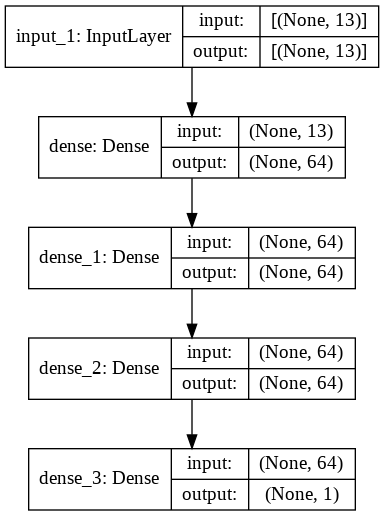

In [12]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 9,281
Trainable params: 9,281
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
13/13 [==============================] - 0s 2ms/step - loss: 138.6051 - mae: 8.3635
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 83.9796 - mae: 6.6868
Epoch 3/100
13/13 [==============================] - 0s 1ms/step - loss: 81.9560 - mae: 6.6282
Epoch 4/100
13/13 [==============================] - 0s 1ms/step - loss: 75.3679 - mae: 6.2043
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 65.1596 - mae: 5.6853
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 52.0397 - mae: 4.9567
Epoch 7/100
13/13 [==============================] - 0s 2ms/step - loss: 42.6455 - mae: 4.2966
Epoch 8/100
13/13 [==============================] - 0s 2ms/step - loss: 33.9455 - mae: 3.9973
Epoch 9/100
13/13 [==============================] - 0s 2ms/step - loss: 28.8124 - mae: 3.5730
Epoch 10/100
13/13 [==============================] - 0s 2ms/step - loss: 24.2549 - mae: 3.4599
Epoch 11/100
13/13 [============================

# evaluation

In [15]:
model.evaluate(x_train, y_train)

13/13 [==============================] - 0s 1ms/step - loss: 8.5889 - mae: 2.2087


[8.588859558105469, 2.2087457180023193]

# Service

In [20]:
x_train[10]

array([ 0.63391647, -0.48361547,  1.0283258 , -0.25683275,  1.15788777,
        0.19313958,  1.11048828, -1.03628262,  1.67588577,  1.5652875 ,
        0.78447637,  0.22689422,  1.04466491])

In [21]:
model.predict([[ 0.63391647, -0.48361547,  1.0283258 , -0.25683275,  1.15788777,
        0.19313958,  1.11048828, -1.03628262,  1.67588577,  1.5652875 ,
        0.78447637,  0.22689422,  1.04466491]])

array([[13.882275]], dtype=float32)

In [22]:
y_train[10]

12.1